In [13]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [14]:
# Step 2: Load dataset
df = pd.read_csv("Iris.csv")

In [15]:
# TO display first 5 rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
#TO get the data types and non-null counts of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
# TO get the summary statistics of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
# To check for missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
# To get the shape of the dataset
df.shape

(150, 6)

In [ ]:
# Step 3: Data Preprocessing
# Drop the 'Id' column as it is not needed for analysis
df.drop(columns=['Id'], inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Figure size 1000x500 with 0 Axes>

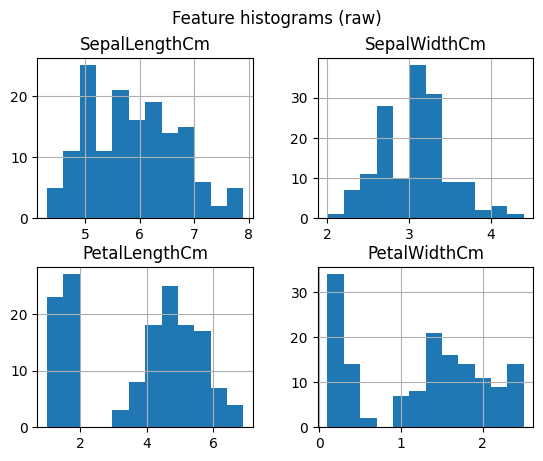

In [23]:
# Quick histograms (raw)
plt.figure(figsize=(10, 5))
df.iloc[:, 0:4].hist(bins=12)
plt.suptitle("Feature histograms (raw)")
plt.show()


In [24]:
# --- Feature / target
X_raw = df.drop(columns=[ "Species"], axis=1)
y = df["Species"]

In [25]:
# --- Split BEFORE scaling to avoid leakage
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# --- Fit scaler on training data only, transform train & test
scaler = StandardScaler()
scaler.fit(X_train_raw)              # fit only on train
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [27]:
# Convert scaled train to DataFrame for easy checks (use ddof=0 so std matches StandardScaler)
X_train_scaled_df = pd.DataFrame(X_train, columns=X_train_raw.columns)
print("TRAIN stats AFTER scaling (should be mean ~0, std ~1):\n",X_train_scaled_df.describe().T[['mean', 'std']], "\n")

TRAIN stats AFTER scaling (should be mean ~0, std ~1):
                        mean       std
SepalLengthCm -1.369275e-16  1.004193
SepalWidthCm   4.551914e-16  1.004193
PetalLengthCm -9.066821e-17  1.004193
PetalWidthCm   5.366078e-17  1.004193 



In [28]:
# --- Find best K using CV (elbow)
k_range = range(1, 21)
cv_scores = []
print("Cross-validation accuracy (train) for each K:")
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
    mean_score = scores.mean()
    cv_scores.append(mean_score)
    print(f"K={k:2d} -> CV accuracy = {mean_score:.4f}")


Cross-validation accuracy (train) for each K:
K= 1 -> CV accuracy = 0.9417
K= 2 -> CV accuracy = 0.9583
K= 3 -> CV accuracy = 0.9583
K= 4 -> CV accuracy = 0.9583
K= 5 -> CV accuracy = 0.9667
K= 6 -> CV accuracy = 0.9667
K= 7 -> CV accuracy = 0.9583
K= 8 -> CV accuracy = 0.9583
K= 9 -> CV accuracy = 0.9583
K=10 -> CV accuracy = 0.9667
K=11 -> CV accuracy = 0.9583
K=12 -> CV accuracy = 0.9667
K=13 -> CV accuracy = 0.9500
K=14 -> CV accuracy = 0.9583
K=15 -> CV accuracy = 0.9500
K=16 -> CV accuracy = 0.9583
K=17 -> CV accuracy = 0.9583
K=18 -> CV accuracy = 0.9417
K=19 -> CV accuracy = 0.9417
K=20 -> CV accuracy = 0.9333


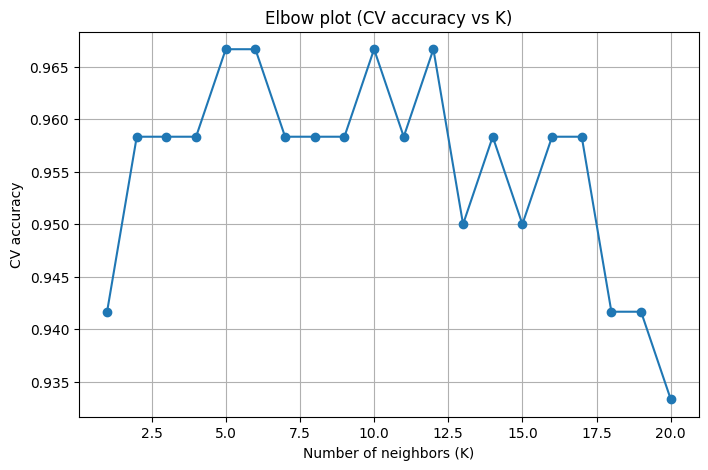


Best K (from CV): 5 with CV accuracy = 0.9667



In [30]:
# Plot elbow
plt.figure(figsize=(8, 5))
plt.plot(list(k_range), cv_scores, marker="o", linestyle="-")
plt.xlabel("Number of neighbors (K)")
plt.ylabel("CV accuracy")
plt.title("Elbow plot (CV accuracy vs K)")
plt.grid(True)
plt.show()
# Best K
best_k = int(np.argmax(cv_scores) + 1)   # +1 because range starts at 1
print(f"\nBest K (from CV): {best_k} with CV accuracy = {max(cv_scores):.4f}\n")

In [31]:
# --- Train final model on scaled train data and evaluate on scaled test data
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

print("TEST set evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

TEST set evaluation:
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [32]:
# --- Decision boundary visualization (using first 2 features, correctly scaled)
X_train_2 = X_train[:, :2]   # already scaled
X_test_2 = X_test[:, :2]

knn_2 = KNeighborsClassifier(n_neighbors=best_k)
knn_2.fit(X_train_2, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [33]:

# Meshgrid
x_min, x_max = X_train_2[:, 0].min() - 1, X_train_2[:, 0].max() + 1
y_min, y_max = X_train_2[:, 1].min() - 1, X_train_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
grid = np.c_[xx.ravel(), yy.ravel()]


In [35]:
# Predict and convert labels to integers for contourf
Z = knn_2.predict(grid)
classes = np.unique(y)   # e.g. ['Iris-setosa', ...]
label_to_int = {lab: i for i, lab in enumerate(classes)}
Z_num = np.vectorize(label_to_int.get)(Z).reshape(xx.shape)

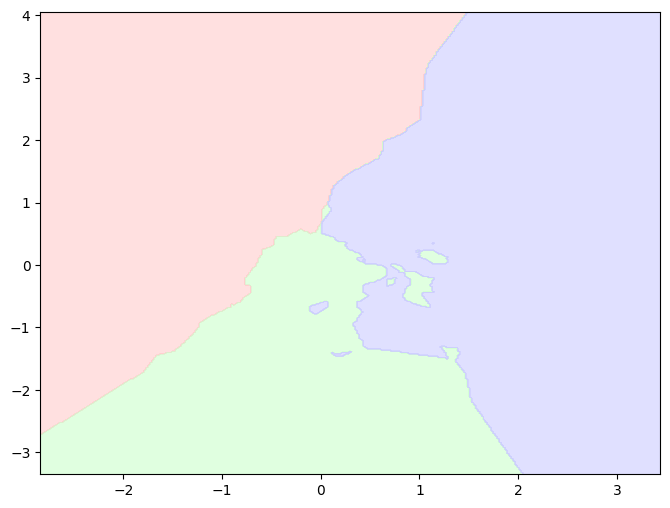

In [36]:

# Plot
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
plt.contourf(xx, yy, Z_num, cmap=cmap_light, alpha=0.6)


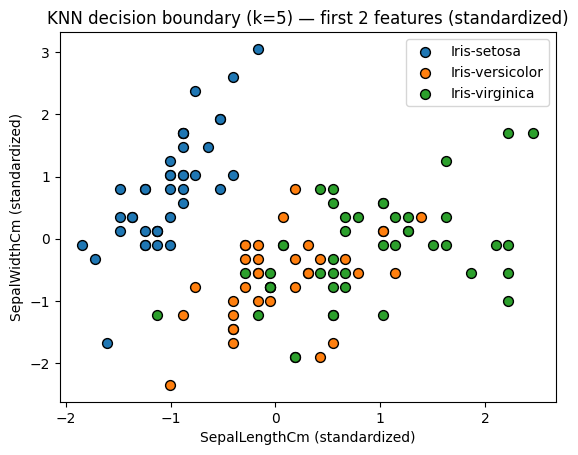

In [37]:
# plot training points (scaled)
for lab, idx_mask in zip(classes, [y_train == cl for cl in classes]):
    plt.scatter(X_train_2[idx_mask, 0], X_train_2[idx_mask, 1],
                label=lab, edgecolor='k', s=50)

plt.xlabel(f"{X_train_raw.columns[0]} (standardized)")
plt.ylabel(f"{X_train_raw.columns[1]} (standardized)")
plt.title(f"KNN decision boundary (k={best_k}) — first 2 features (standardized)")
plt.legend()
plt.show()